In [1]:
import ausweather

In [2]:
import logging; logging.basicConfig(level=logging.INFO)

In [3]:
db = ausweather.Database('test.sqlite')

In [4]:
df = db.fetch_bom_station_lists()

INFO:ausweather.database:ncc_obs_codes="auto" -> still missing: [136, 122]
INFO:ausweather.bom:Fetching BoM station list for AUS obsCode 136
INFO:ausweather.bom:Fetching BoM station list for AUS obsCode 122


Now note that it will not download these lists again:

In [5]:
df = db.fetch_bom_station_lists()

INFO:ausweather.database:ncc_obs_codes="auto" -> still missing: []


In [6]:
df.head()

,Site,Name,Lat,Lon,Start,End,Years,%,AWS,ncc_obs_code,ncc_obs_descr
0,41497,AAC DALBY CAMPUS,-27.1494,151.2894,1985-08-01 00:00:00,2012-09-01 00:00:00,26.8,96,N,136,Daily total rainfall
1,33259,ABBOT POINT BULKCOAL,-19.8833,148.0750,1991-01-01 00:00:00,1991-06-01 00:00:00,0.5,100,N,136,Daily total rainfall
2,67114,ABBOTSBURY (FAIRFIELD (CITY FARM)),-33.8667,150.8611,2000-12-01 00:00:00,2020-02-01 00:00:00,18.8,95,N,136,Daily total rainfall
3,40000,ABBOTSFORD,-27.9500,153.1000,1909-10-01 00:00:00,1974-07-01 00:00:00,64.3,99,N,136,Daily total rainfall
4,86307,ABBOTSFORD,-37.8000,145.0000,1972-05-01 00:00:00,1972-09-01 00:00:00,0.4,99,N,136,Daily total rainfall


Let's plot rainfall stations locations

In [16]:
import pandas as pd
%matplotlib inline

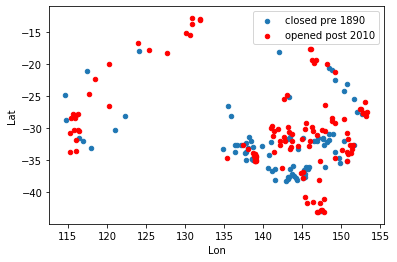

In [25]:
fig, ax = plt.subplots()
df[(pd.to_datetime(df.End) <= pd.Timestamp('1900')) & (df.ncc_obs_code == 136)].plot.scatter(
    x='Lon', y='Lat', label='closed pre 1890', ax=ax)
df[(pd.to_datetime(df.Start) >= pd.Timestamp('2015')) & (df.ncc_obs_code == 136)].plot.scatter(
    x='Lon', y='Lat', label='opened post 2010', color='r', ax=ax)

In [6]:
import os

db.close()
os.remove(db.filename)